# EDA on 1000 Movies data 


## Table of Contents 



1. [Problem Statement](#1)

2. [Importing Packages](#2)

3. [Loading Data and description](#3)
   
   3.1 [Pandas Profiling before Data Preprocessing](#3.1)
4. [Data Preprocessing](#4)
   
   4.1 [Pandas Profiling after Data Preprocessing](#4.1)
5. [Exploratory Data Analysis](#5)
6. [Conclusion](#6)


## 1. Problem statement <a id='1' ></a>

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, combining, reshaping, slicing and transforming data for analysis purpose.
* Exploratory Data Analysis 
 Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data
* Determining relationships in Data
* Checking of assumptions
* Preliminary selection of appropriate models
* Detection of mistakes 



## 2. Importing Packages <a id='2' ></a>

In [53]:
import pandas as pd
import re 
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)



## 3. Loading Data and description <a id='3' ></a>

### Data description

Dataset consists of 1,000 most popular movies on IMDB taken between 2006 and 2016. The data fields consists of 12 columns including Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue and Metascrore.


## Importing Dataset

In [60]:
df= pd.read_csv('C:/Users/bkraghax/Documents/insaid/project/1000Movies.csv',index_col=0)


df.describe(include= 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,13,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,Action,Two aimless middle-aged losers still living at...,Ridley Scott,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,293,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,67.232000,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,9.454288,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,19.000000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,62.000000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,68.000000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,74.000000,2.399098e+05,113.715000,72.000000


## 3.1 Pandas Profiling before Data Preprocessing <a id= '3.1' ></a>

In [ ]:
import pandas_profiling 

profile = df.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing_movies.html")


## Dataset info

* Number of variables :12  
* Number of observations:1000  
* Missing cells :192 (1.6%) 






### Variables types

* Numeric = 7 
* Categorical = 4 
* Text (Unique) = 1 


* <b>Actors</b> has a high cardinality: 996 distinct values 

* <b>Director</b> has a high cardinality: 644 distinct values 

* <b>Metascore</b> has 64 (6.4%) missing values  

* <b>Revenue_(Millions)</b> has 128 (12.8%) missing values

* <b>Title</b> has a high cardinality: 999 distinct values  


## 4. Data Preprocessing <a id='4' ></a>

* Dropping the missing entries in Metascore and Revenue_(Millions) 

In [56]:
df.dropna(inplace=True)

* Rating and Metascore are converted from Float to int type for better analysis 

In [ ]:
def fn(ft):
    return int(ft)

df['Rating']=df['Rating'].apply(fn)
df['Metascore']=df['Metascore'].apply(fn)

df.to_csv('1000Moviedata.csv') # saving the modified dataset to new csv file
df= pd.read_csv('C:/Users/bkraghax/Documents/insaid/project/1000Moviedata.csv',index_col=0)


## 4.1 Pandas Profiling after Data Preprocessing <a id='4.1' > </a>

In [ ]:
profile = df.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing_movie.html")


## Dataset info

* Number of variables : 12  
* Number of observations :838  
* Missing cells: 0 (0.0%) 
* Duplicate rows: 0 (0.0%) 

## 5. Exploratory Data Analysis <a id='5' ></a>

In [57]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_(Minutes),Rating,Votes,Revenue_(Millions),Metascore
0,1,Guardians of the Galaxy,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,81,757074,333.13,76
1,2,Prometheus,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,70,485820,126.46,65
2,3,Split,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,73,157606,138.12,62
3,4,Sing,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,72,60545,270.32,59
4,5,Suicide Squad,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,62,393727,325.02,40


# Which are the top 10 different genres among the movies ?

In [63]:
df['Genre'].value_counts()[:10]

Action       293
Drama        195
Comedy       175
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        46
Mystery       13
Thriller      10
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Donut Plot showing the proportion of each Genre ')

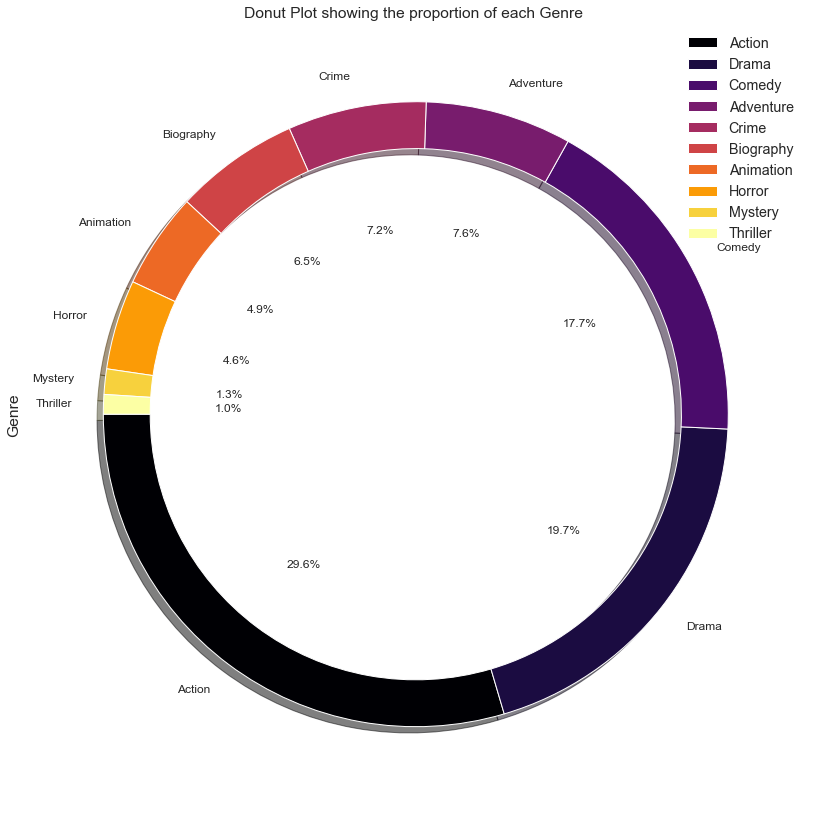

In [64]:
df['Genre'].value_counts()[:10].plot(kind='pie',fontsize=12, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=180, figsize=(14,16), cmap='inferno',legend=True)
plt.ylabel('Genre')
plt.title('Donut Plot showing the proportion of each Genre ')

* Action , Comedy and Drama are the most common genres among the movies followed by adventure  , crime and biography .


# Which are Top 20  movies with highest gross Revenue ?





In [38]:
df_hgross=df.iloc[df['Revenue (Millions)'].sort_values(ascending=False).index,:][:20]
df_hgross

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
41,51,Star Wars: Episode VII - The Force Awakens,Action,Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,81,661608,936.63,81
76,88,Avatar,Action,A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,78,935408,760.51,83
74,86,Jurassic World,Action,"A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,70,455169,652.18,59
65,77,The Avengers,Action,Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,81,1045588,623.28,69
45,55,The Dark Knight,Action,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,90,1791916,533.32,82
11,13,Rogue One,Action,The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,79,323118,532.17,65
104,120,Finding Dory,Animation,"The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,74,157026,486.29,77
83,95,Avengers: Age of Ultron,Action,When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,74,516895,458.99,66
108,125,The Dark Knight Rises,Action,Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,85,1222645,448.13,78
502,579,The Hunger Games: Catching Fire,Action,Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,76,525646,424.65,76


* <b>Star wars Episode 7</b> is the highest grossing Movie followed by <b>Avatar</b> ,<b>Jurrasic world</b> and <b>The Avengers</b>.

# Distribution between audience rating and Critics rating among Top 20 highest grossing movies 



In [67]:
df_hgross['Rating'].describe()

count    20.000000
mean     76.150000
std       6.761151
min      60.000000
25%      72.750000
50%      75.500000
75%      81.000000
max      90.000000
Name: Rating, dtype: float64

In [68]:
df_hgross['Metascore'].describe()

count    20.000000
mean     70.250000
std      13.150445
min      35.000000
25%      62.000000
50%      71.500000
75%      78.750000
max      92.000000
Name: Metascore, dtype: float64

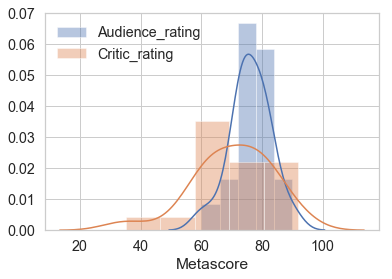

In [69]:
import seaborn as sns
%matplotlib inline


sns.distplot(df_hgross['Rating'],hist=True ,kde=True,label='Audience_rating')
sns.distplot(df_hgross['Metascore'],hist=True ,kde=True,label='Critic_rating')
plt.legend()

* <b>Audience rating (Rating)</b> is on higher side mostly between 70-90 and it is less spread  , whereas <b>Critics rating</b> is more spread 

# How does Audience and critic ratings vary with Runtime (Minutes) of movies ?

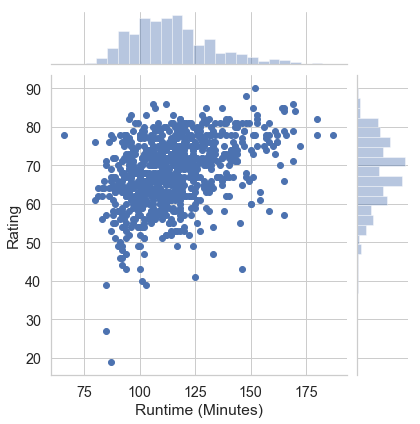

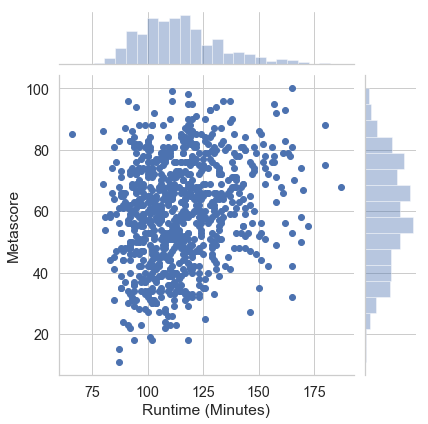

In [41]:


sns.jointplot(x=df['Runtime (Minutes)'], y=df['Rating'], data=df);
sns.jointplot(x=df['Runtime (Minutes)'], y=df['Metascore'], data=df);

* Runtime of most of the movies falls between 100-125mins and Audience ratings are in range 60-80 for the same .Movies with longer runtimes are also mostly rated above 70 by audience. 
* Critics ratings is widely spread between 20 to 80 for movies under 125 mins . Movies longer than 125 mins are mostly rated above 60 . 
* It seems both audience and critics have liked movies with longer runtimes .

# How does Gross Revenue related with Number of Votes ?

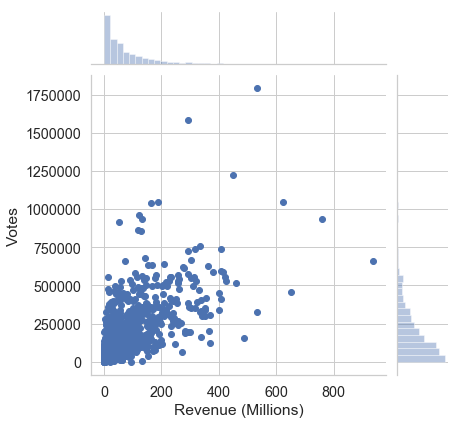

In [42]:
sns.jointplot(x=df['Revenue (Millions)'], y=df['Votes'], data=df);

* It seems movies which has collected more than 200 Millions have also got more number of votes . 

# How does Revenue of movies related to audience and critics rating ? 

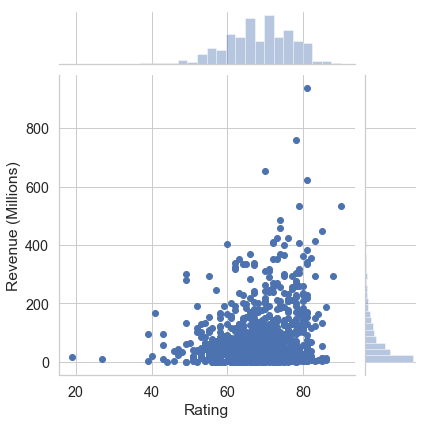

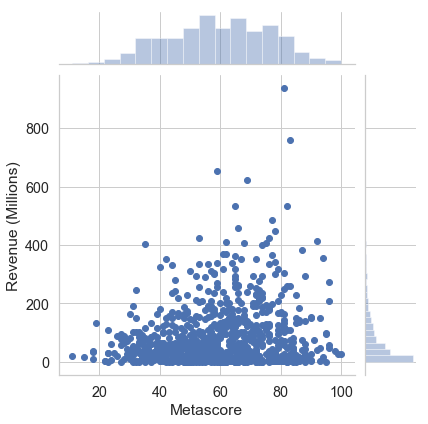

In [44]:

sns.jointplot(y=df['Revenue (Millions)'], x=df['Rating'], data=df);
sns.jointplot(y=df['Revenue (Millions)'], x=df['Metascore'], data=df);

* It can be observed that movies which have earned more than  200 Million USD have been rated above 60 by audience 
* It seems that in general critic rating is spread out and has not much relevance to gross revenue ,but movies which have collected more than 400 Million USD have received good ratings  by critics also .

# How does audience  rating  vary over different genres ?

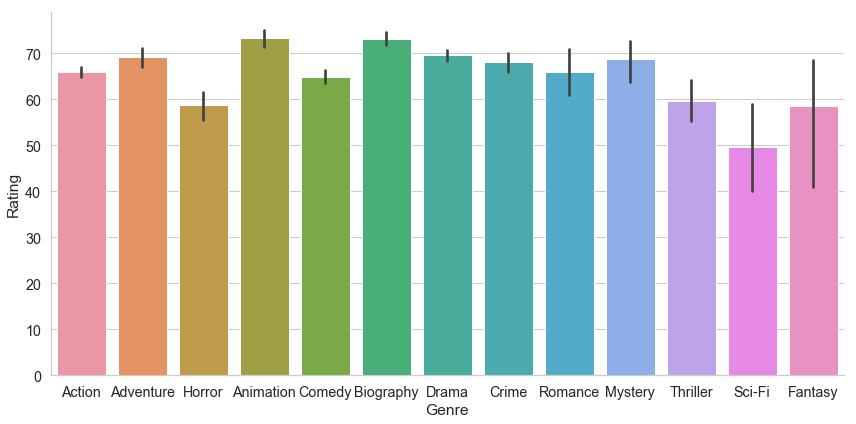

In [83]:
sns.catplot(x="Genre", y="Rating", kind="bar", data=df, orient="v",height=6, aspect=2);

* Animation, Biography and Drama seems to be most liked genres by the audience .

# Who are the top 10 directors who has directed most number of movies ?

In [10]:
df['Director'].value_counts().sort_values(ascending=False)[:10]

Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
Denis Villeneuve      5
Martin Scorsese       5
Zack Snyder           5
David Fincher         5
J.J. Abrams           5
Christopher Nolan     5
Name: Director, dtype: int64

* Ridley scott with 8 movies ,followed by Michael Bay , David Yates and Paul Anderson are among top 10 directors .

## Who are the most common director among Top 20 movies of highest gross revenue ?

In [12]:
df_hgross['Director'].value_counts()

Christopher Nolan    2
Joss Whedon          2
Chris Buck           1
Pierre Coffin        1
Anthony Russo        1
Andrew Stanton       1
James Cameron        1
Gareth Edwards       1
Gary Ross            1
J.J. Abrams          1
Colin Trevorrow      1
David Yates          1
Lee Unkrich          1
Gore Verbinski       1
Michael Bay          1
Shane Black          1
Francis Lawrence     1
Chris Renaud         1
Name: Director, dtype: int64

* <b>Christopher Nolan</b> and <b>Jess Whedon</b> are most common directors among Top 20 highest grossing movies .
* Another observation is that <b>Christopher Nolan</b> is also among Top 10 directors with highest number of movies, where he has directed 5 movies over a period of 10 years . 
* Hence it can be inferred that he is one of the most successful directors .

### List of movies directed by Christopher Nolan 

In [80]:
df_popdir= df[df['Director']=='Christopher Nolan']
df_popdir

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
36,37,Interstellar,Adventure,A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,86.0,1047747,187.99,74.0
54,55,The Dark Knight,Action,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,90.0,1791916,533.32,82.0
64,65,The Prestige,Drama,Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,85.0,913152,53.08,66.0
80,81,Inception,Action,"A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,88.0,1583625,292.57,74.0
124,125,The Dark Knight Rises,Action,Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,85.0,1222645,448.13,78.0


## Comparison of Audience rating for all Nolan's movies with respect to overall audience rating for other movies

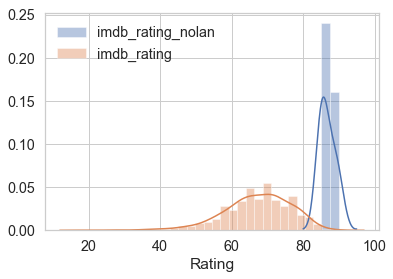

In [81]:
sns.distplot(df_popdir['Rating'],hist=True ,kde=True,label='imdb_rating_nolan')
sns.distplot(df['Rating'],hist=True ,kde=True,label='imdb_rating')
plt.legend()

* It can be observed that audience have rated the movies of <b>Chrisopher Nolan</b> mostly above 80 which is  well above the  average rating for all other movies . 
* Hence Christopher Nolan can be considered as one of the most popular directors among the audience and also with a very high success ratio at Box office . 
* Hence Production companies can consider him for their upcoming productions .

## 6. Conclusion <a id='6' ></a>

* With the help of notebook I learnt how exploratory data analysis can be carried out using Pandas plotting.
* Also I have seen making use of packages like matplotlib and seaborn to develop better insights about the data.
* I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. 
* I also make use of pandas profiling feature to generate an html report containing all the information of 
the various features present in the dataset.
* Action , Comedy and Drama are the most common genres among the movies . Animation,Biography and Drama are most preferred genres for the audience.
* I have observed the impact of Genre,Audience rating,crtics rating and votes on the Gross Revenue collection of the movies.
* I have tried to explore the most successful directors among the given dataset, whose movies have got good ratings by audience and also made good collection at the box office.This can help the production houses to sign for their upcoming projects.
* This analysis can help me to choose which machine learning model we can apply to predict the success of movies .
